About this Dataset
Context
Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content
Attributes

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month
Target
Need to perform clustering to summarize customer segments.

https://www.kaggle.com/karnikakapoor/customer-segmentation-clustering/notebook#DATA-PREPROCESSING

In [2]:
#기본 라이브러리
import numpy as np
import pandas as pd
import os
import time

#시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)


#그래프 스타일 서식 지정
plt.style.use('default')
#그래프 한글 폰트
from matplotlib import font_manager, rc
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

#사이킷런
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = pd.read_csv('data/marketing_campaign.csv', sep = "\t")
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data = data.dropna()

In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [7]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
data['Age'] = 2021 - data['Year_Birth']

In [9]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,40


In [10]:
data = data.drop('Year_Birth', axis=1)

In [11]:
data = data.drop('ID', axis=1)

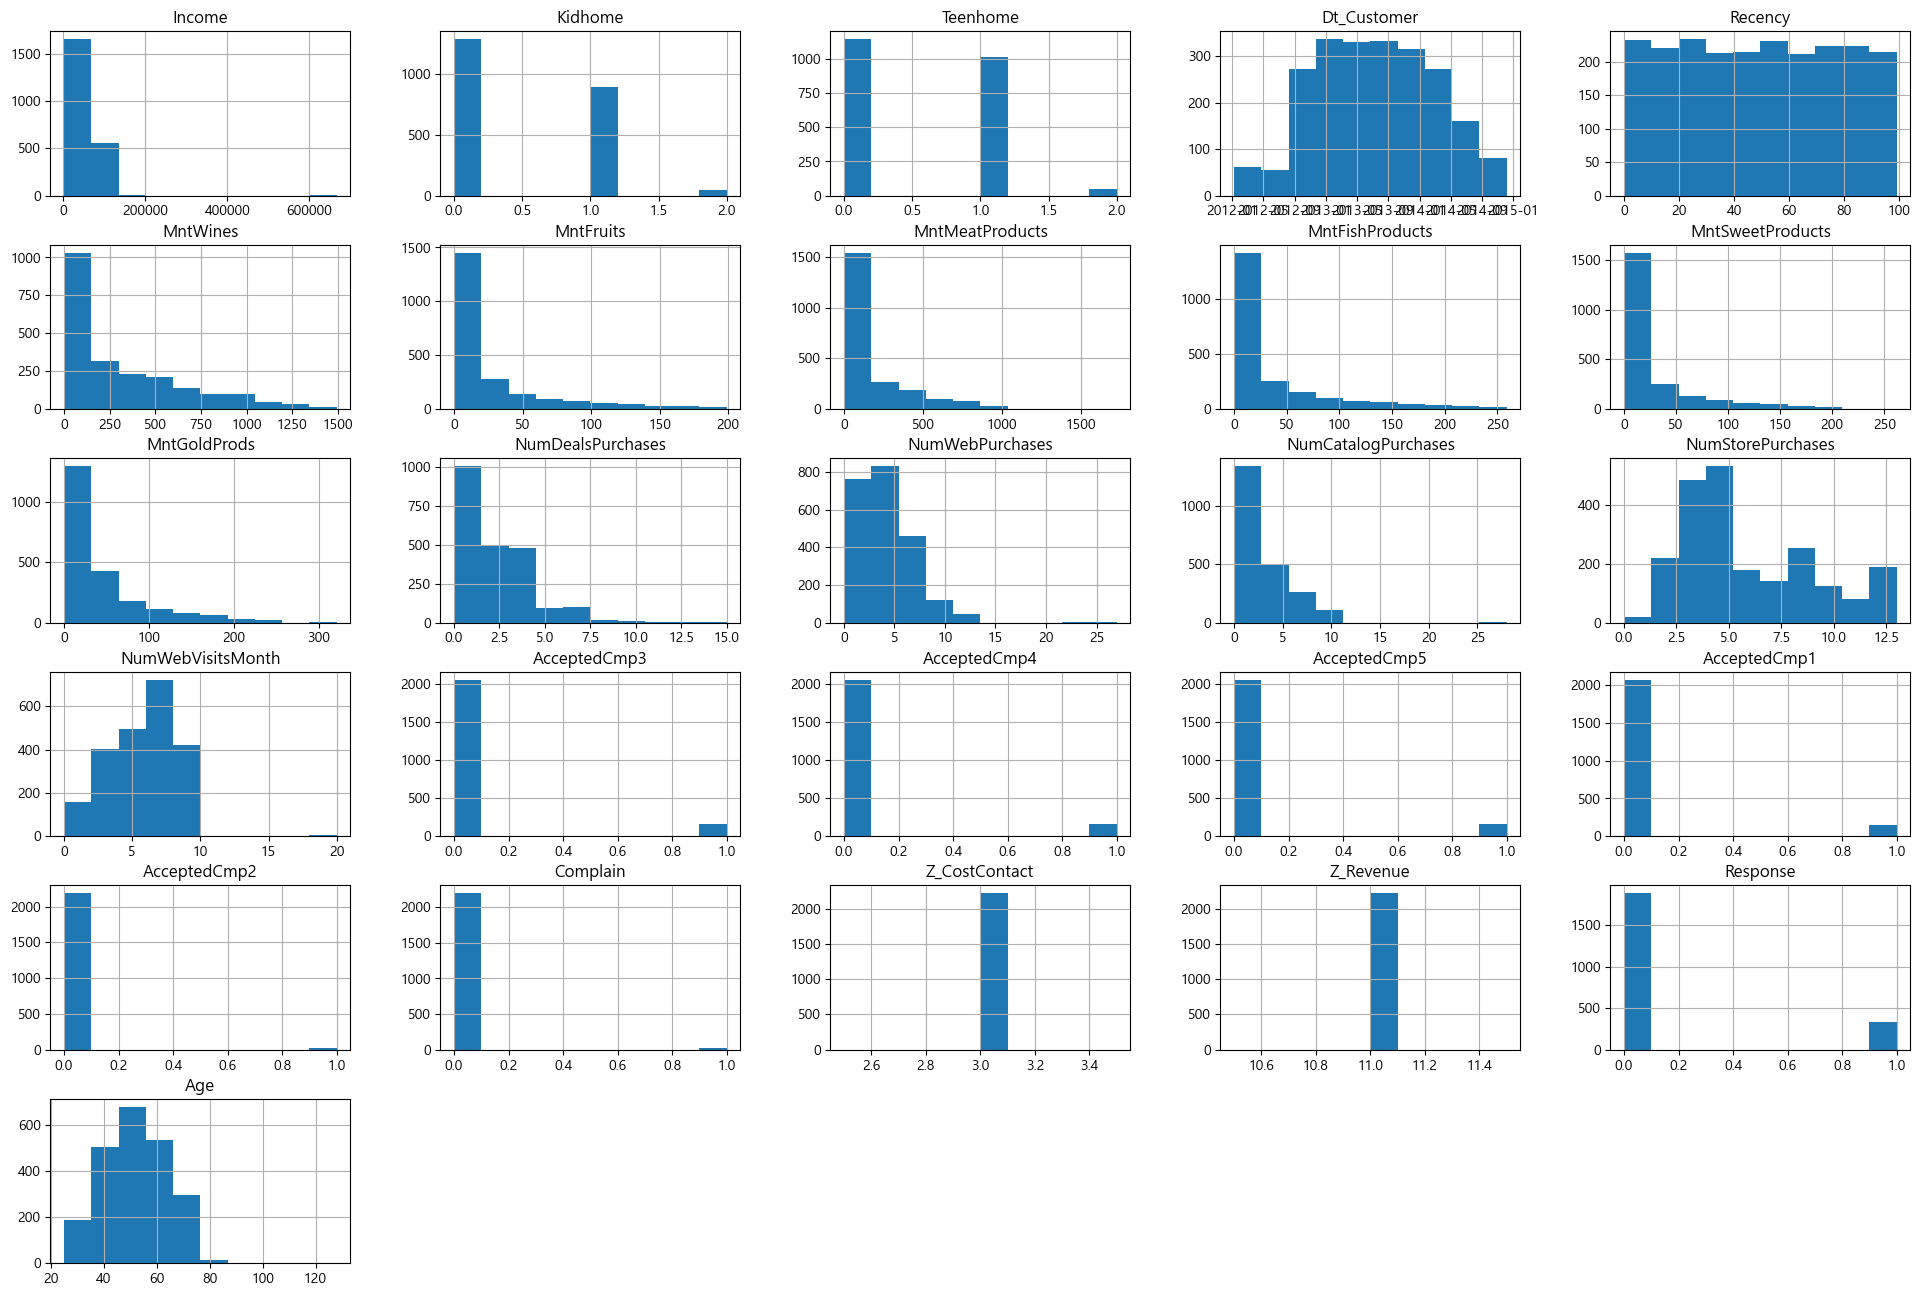

In [12]:
data.hist(figsize = (24,16))
plt.show()

In [13]:
numeric_col = [col for col in data if data[col].dtype != "object" ]
object_col = [col for col in data if data[col].dtype == "object" ]

In [14]:
LE=LabelEncoder()
for i in object_col:
    data[i]=data[[i]].apply(LE.fit_transform)

In [15]:
data_eda = data.copy()

In [16]:
data_eda.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,2,4,58138.0,0,0,2012-04-09,58,635,88,546,...,0,0,0,0,0,0,3,11,1,64
1,2,4,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,0,0,0,0,3,11,0,67
2,2,5,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,3,11,0,56
3,2,5,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,0,0,0,0,3,11,0,37
4,4,3,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,0,3,11,0,40


In [17]:
data_eda = data_eda.drop('Dt_Customer', axis=1)

In [18]:
scaler = StandardScaler()
scaler.fit(data_eda.values)
df_scaled = scaler.transform(data_eda)
df_scaled = pd.DataFrame(df_scaled,columns= data_eda.columns )

C:\Users\anjui\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [19]:
df_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,0.986443
1,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.236801
2,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0.318822
3,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.266777
4,1.429011,-0.673866,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-1.016420


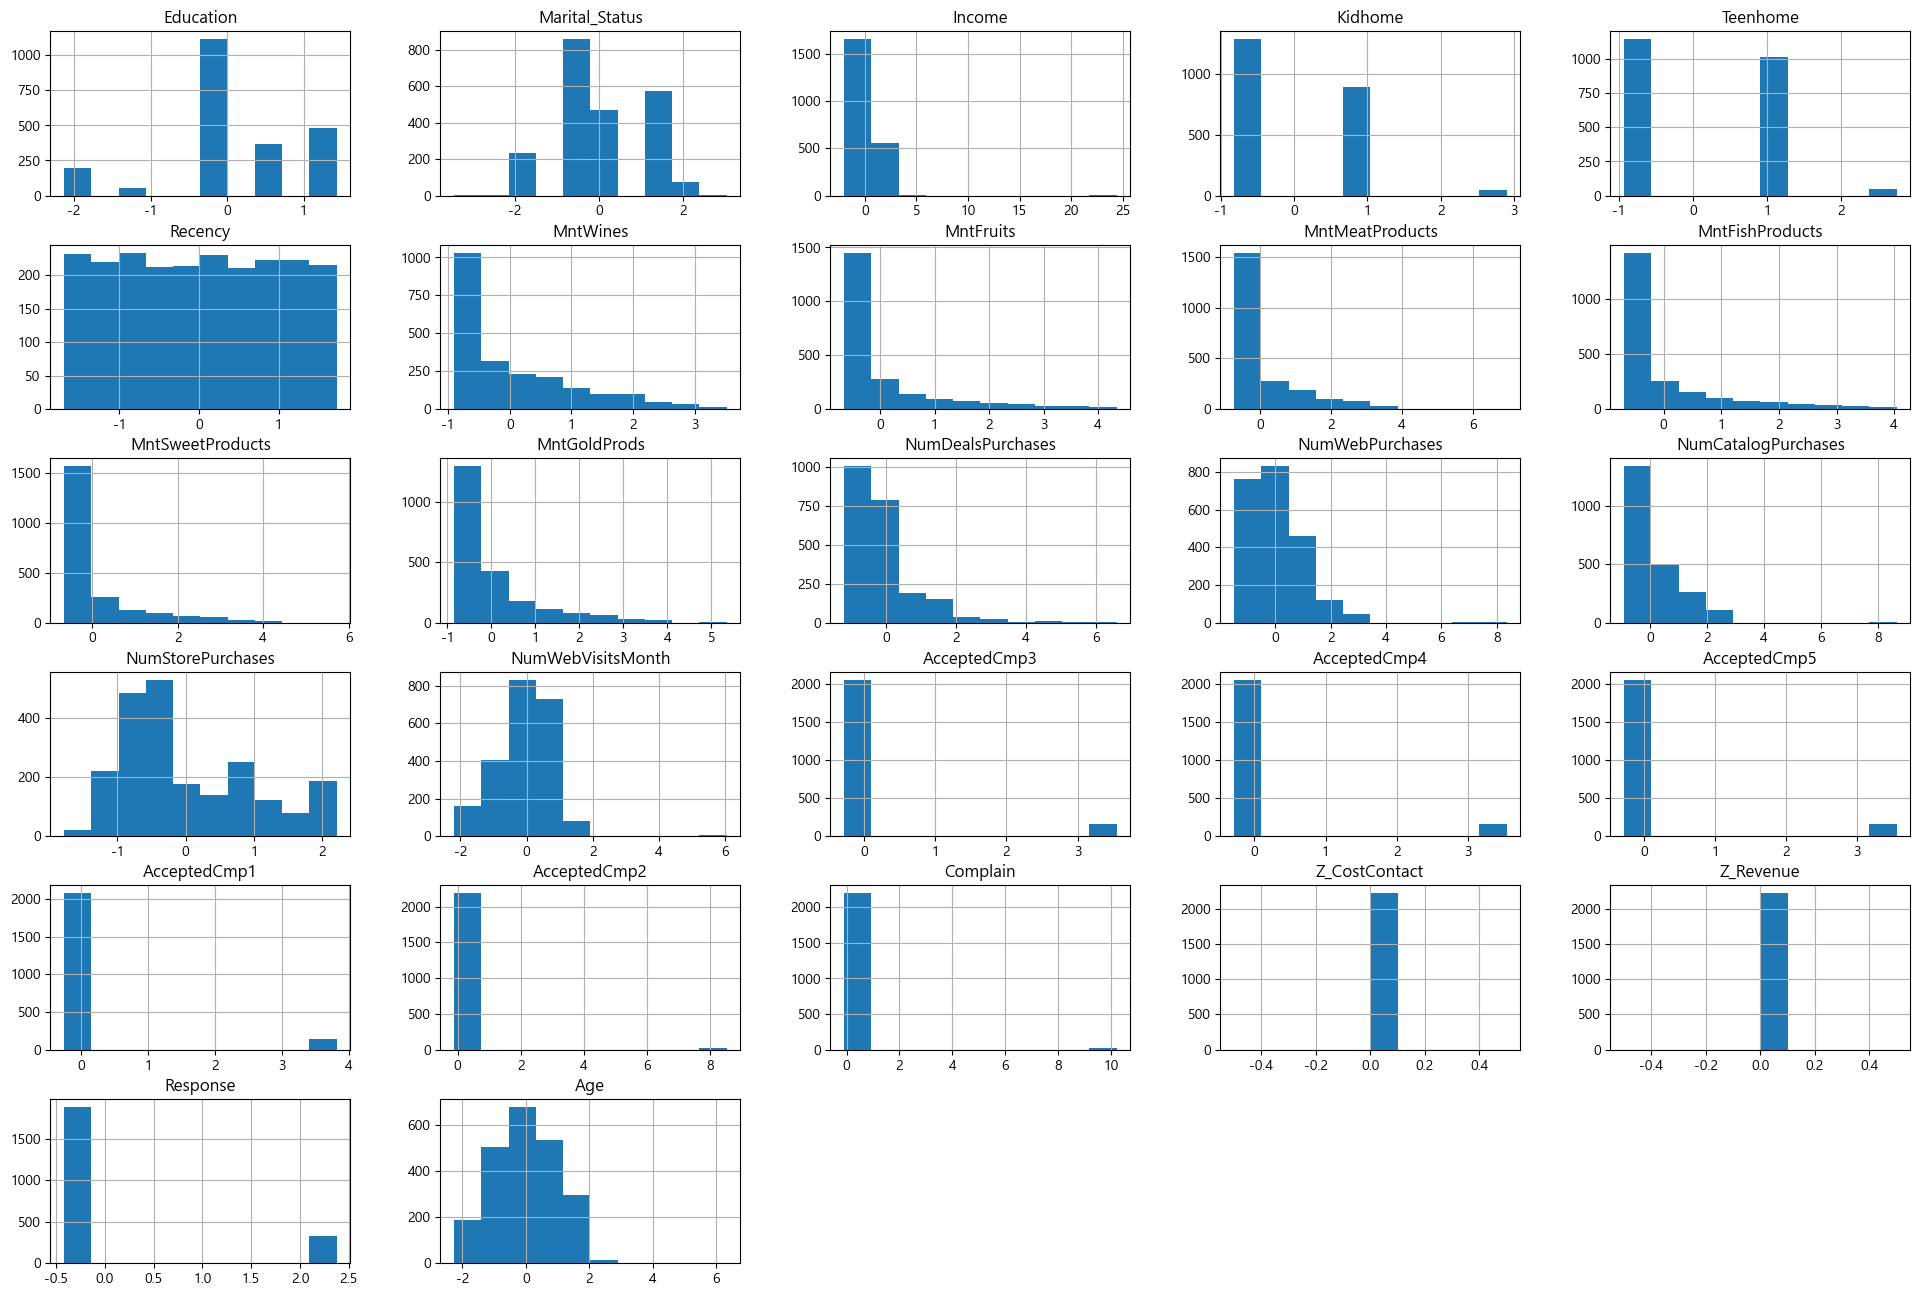

In [20]:
df_scaled.hist(figsize = (24,16))
plt.show()

In [21]:
k = 3
# 주성분 개수를 k개로 하는 PCA 모델 생성
pca = PCA( n_components = k ) 
# 표준화된 변수에 대해 PCA 수행
df_pca = pca.fit_transform(df_scaled)

In [22]:
df_pca

array([[ 3.76425293, -0.33183483, -0.41158595],
       [-2.38435673,  0.18236771, -0.2380055 ],
       [ 1.62174164, -0.16412938, -1.11181457],
       ...,
       [ 1.44199515,  0.11900189,  0.92547918],
       [ 1.77749024,  1.26330913, -1.19997701],
       [-1.66240922,  1.25619141,  1.16979724]])

In [23]:
# Scores (주성분 점수)

# 주성분 컬럼명 리스트 생성 ( ['PC1', 'PC2', ....] )
pc_names = []
for i in range( 1, k+1 ):
    pc_names.append( 'PC'+str(i) )

# 주성분 분석결과 데이터프레임 생성
df_pca = pd.DataFrame( df_pca, columns = pc_names)

print('< 주성분 점수 >')
display( df_pca )
print()

print('< 주성분 간의 상관계수 >')
display( df_pca.corr() )

< 주성분 점수 >


,PC1,PC2,PC3
0,3.764253,-0.331835,-0.411586
1,-2.384357,0.182368,-0.238006
2,1.621742,-0.164129,-1.111815
3,-2.517010,-1.432575,0.218038
4,-0.442599,0.009354,-0.465256
...,...,...,...
2211,2.359733,1.040960,-1.438112
2212,-0.929674,2.936151,1.327328
2213,1.441995,0.119002,0.925479
2214,1.777490,1.263309,-1.199977



< 주성분 간의 상관계수 >


,PC1,PC2,PC3
PC1,1.000000e+00,-1.468769e-17,-1.657511e-17
PC2,-1.468769e-17,1.000000e+00,1.092545e-16
PC3,-1.657511e-17,1.092545e-16,1.000000e+00


In [24]:
# 주성분 각각의 설명력 및 설명력 비율

pd.DataFrame( {'주성분 별 설명력' : pca.explained_variance_,
               '주성분 별 설명력 비율' : pca.explained_variance_ratio_},
             index = pc_names )

,주성분 별 설명력,주성분 별 설명력 비율
PC1,6.547618,0.261787
PC2,2.089976,0.083561
PC3,1.924922,0.076962


In [25]:
df_pca

,PC1,PC2,PC3
0,3.764253,-0.331835,-0.411586
1,-2.384357,0.182368,-0.238006
2,1.621742,-0.164129,-1.111815
3,-2.517010,-1.432575,0.218038
4,-0.442599,0.009354,-0.465256
...,...,...,...
2211,2.359733,1.040960,-1.438112
2212,-0.929674,2.936151,1.327328
2213,1.441995,0.119002,0.925479
2214,1.777490,1.263309,-1.199977


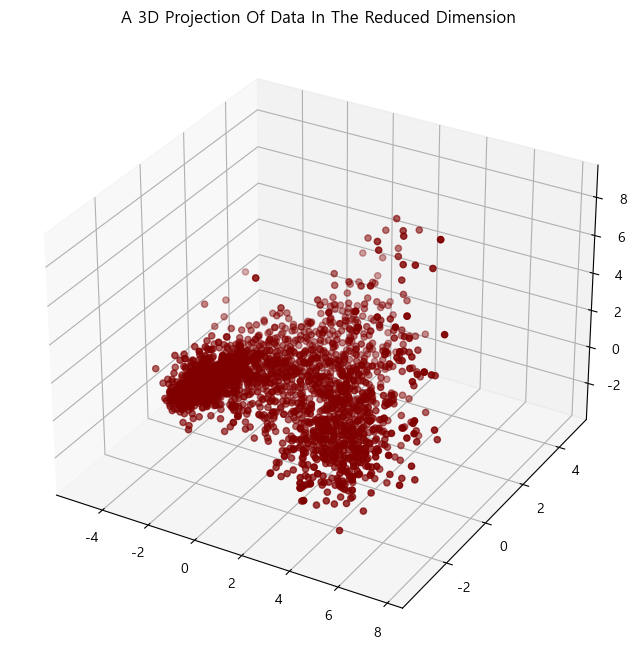

In [26]:
x =df_pca["PC1"]
y =df_pca["PC2"]
z =df_pca["PC3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

C:\Users\anjui\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning:

invalid value encountered in sqrt



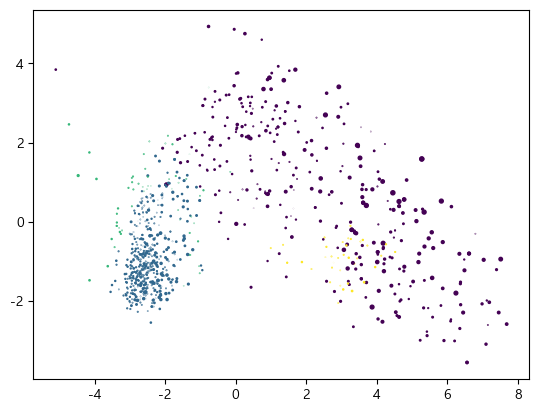

In [27]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(df_pca)
labels = gmm.predict(df_pca)

plt.scatter(x, y, z, c=labels, cmap='viridis')

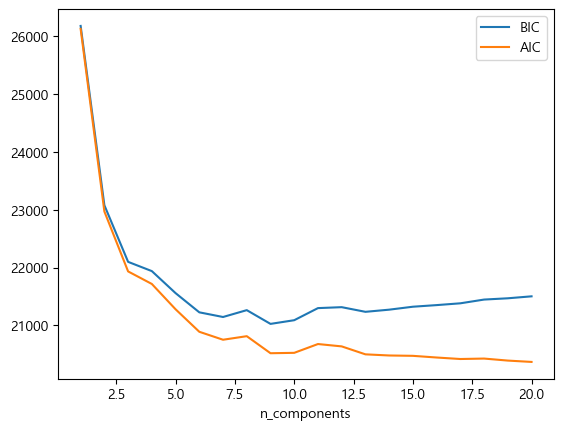

In [28]:
# BIC, AIC

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_pca) for n in n_components]

plt.plot(n_components, [m.bic(df_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

C:\Users\anjui\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning:

invalid value encountered in sqrt



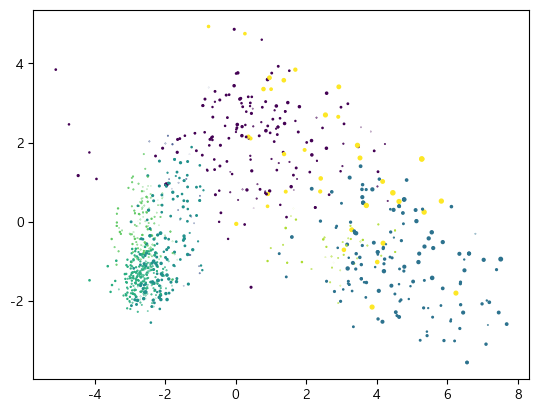

In [29]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=9).fit(df_pca)
labels = gmm.predict(df_pca)

plt.scatter(x, y, z, c=labels, cmap='viridis')